This Notebook describes how to calculate Feature Importance using sklearn. Feature Importance can be useful for feature selection, understanding the data as well as understanding the model

In [2]:
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [3]:
import pandas as pd

In [4]:
X

array([[-2.02220122,  0.31563495,  0.82797464, ..., -0.50446586,
         0.23009474,  0.76201118],
       [ 0.71256194,  1.74103872, -1.21466535, ...,  1.04131149,
        -0.75850596,  0.74791592],
       [ 0.08338884,  0.92829021,  1.45167891, ...,  1.22393601,
         0.3416886 , -0.12517266],
       ...,
       [ 0.12182436,  0.74220833, -0.64488697, ..., -2.37934499,
         1.82039313, -1.55531804],
       [ 0.00820639, -0.89191578,  0.14747174, ..., -1.78611048,
         0.71238157, -1.07498942],
       [-0.43805451,  0.29078795,  0.17794556, ..., -0.18581086,
        -0.26120192,  0.8632634 ]])

In [5]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,-2.022201,0.315635,0.827975,-0.306204,0.160037,-1.444114,0.876169,-0.504466,0.230095,0.762011
1,0.712562,1.741039,-1.214665,0.385692,-0.809715,-0.550694,-0.051473,1.041311,-0.758506,0.747916
2,0.083389,0.928290,1.451679,-0.424983,-0.300931,0.189199,0.251310,1.223936,0.341689,-0.125173
3,-0.376360,1.694051,0.397112,-0.919975,-0.362023,0.472427,0.876808,0.661291,-0.072041,0.205317
4,0.237884,-1.045509,-1.087603,-0.792266,-0.206058,0.620718,-0.683158,-2.095867,-0.583576,-1.544487
...,...,...,...,...,...,...,...,...,...,...
995,-0.546722,-1.195621,-0.237645,-0.329651,-0.040697,1.427674,-1.027729,0.143507,0.861699,2.658537
996,-0.249103,-0.701411,0.129788,0.280823,1.197584,-0.651070,-0.990905,-0.222846,-0.578698,1.398750
997,0.121824,0.742208,-0.644887,0.505844,-1.439014,0.405275,-0.629812,-2.379345,1.820393,-1.555318
998,0.008206,-0.891916,0.147472,0.424746,1.101025,0.442575,-0.574374,-1.786110,0.712382,-1.074989


In [6]:
y

array([-8.42877859e+01, -9.94927008e+01,  1.05787034e+01,  5.37899294e+01,
       -3.70135471e+00,  3.75987136e+01, -1.35735590e+02,  9.35036987e+01,
       -1.03941968e+02,  1.41989579e+01,  1.12479751e+02,  3.00996991e+02,
        1.09526570e+01, -1.07835903e+02,  3.77182129e+01,  1.54366306e+02,
       -4.96393292e+01,  6.23171752e+01, -2.55567671e+02,  4.13245345e+01,
       -1.23446014e+01, -6.10173687e+01,  1.70252877e+02,  1.14872670e+01,
       -3.20300581e+01, -7.01207608e+01,  2.38563440e+01, -1.35524167e+02,
       -9.41054198e+01, -5.91991022e+01, -1.28756571e+02, -2.74040879e+02,
       -1.04228021e+02,  2.25645580e+01,  6.68745459e+01, -1.65001206e+02,
       -3.26368058e+02, -8.41699009e+01, -1.40487772e+02, -1.13560037e+02,
       -8.21439461e+01, -7.06317277e+01,  5.87671092e+01, -1.30319586e+02,
       -1.79488620e+01, -4.33391987e+01,  4.15431377e+02,  1.64720491e+02,
       -2.21775008e+01, -6.46293437e+01, -5.17193029e+01,  3.75124689e+02,
       -1.18336852e+02,  

Linear Regression based Feature Importance - Here the cofficient values are signed i.e. the variables with negative coffi

In [7]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [9]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_

In [ ]:
importance

array([-2.78228246e-14,  1.24448279e+01, -2.30926389e-14, -2.33146835e-14,
        9.33222545e+01,  8.65081100e+01,  2.67460667e+01,  3.28534640e+00,
       -2.48689958e-14,  3.10862447e-14])

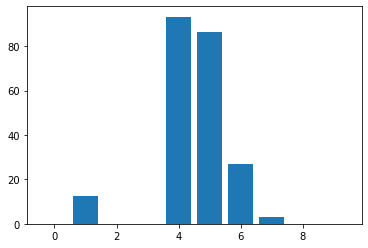

In [12]:
pyplot.bar(range(len(importance)), importance)
pyplot.show()

Feature Importance using Decision Trees, here the values are always positive

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

In [15]:
importance

array([0.00271118, 0.00493268, 0.00237983, 0.00191682, 0.51703334,
       0.43714788, 0.02747989, 0.00256339, 0.00277039, 0.0010646 ])

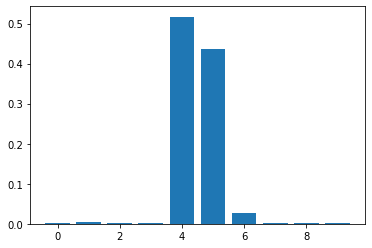

In [16]:
pyplot.bar(range(len(importance)), importance)
pyplot.show()

Feature Importance using Random Forest, here the values are always positive

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

In [19]:
importance

array([0.00284633, 0.00541182, 0.00266989, 0.00283461, 0.52647018,
       0.42488359, 0.02589281, 0.00300864, 0.00314514, 0.002837  ])

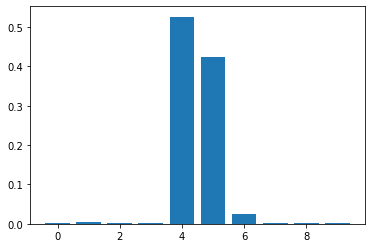

In [20]:
pyplot.bar(range(len(importance)), importance)
pyplot.show()

**Permutation Feature Importance**

This method can be used to calculate Feature Importance values for models which natively do not support feature Importance techniques

In this method we train a model first

Then we take the train or test data and scramble/permute its one feature

Then we calculate the metric (MSE for regression and accuracy/f1-score/any other metric for classification) and calulate the change from the initial value (without scrambling). 

This will provide an estimate of the importance of the feature

This process can be repeated for all the features to calculate their feature importance values

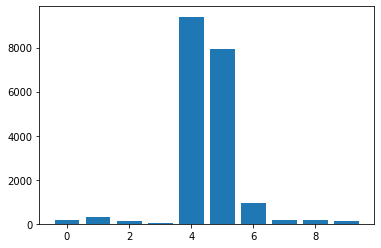

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()